In [2]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

Text(0, 0.5, '')

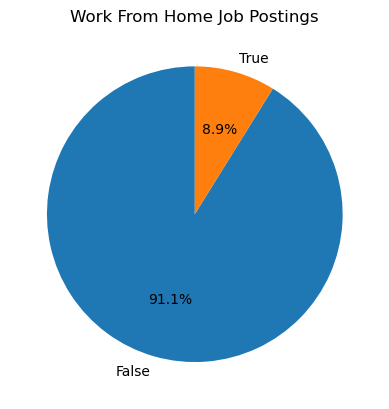

In [3]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work From Home Job Postings')
plt.ylabel('')  # Hides the y-label for better aesthetics   

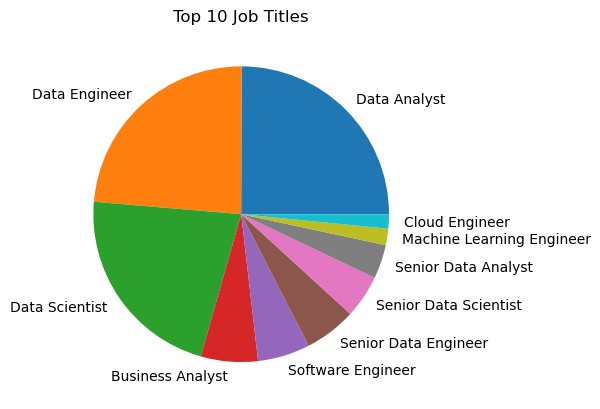

In [4]:
df['job_title_short'].value_counts().head(10).plot(kind='pie')
plt.title('Top 10 Job Titles')
plt.ylabel("")
plt.show()

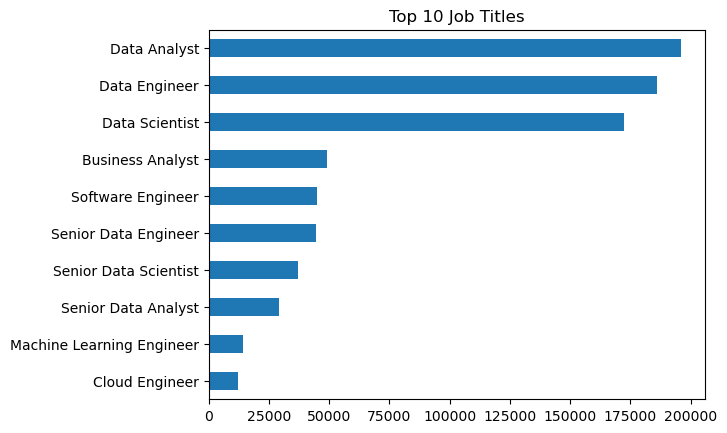

In [5]:
df['job_title_short'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Job Titles')
plt.ylabel("")
inverted_y_axis = plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()

In [6]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


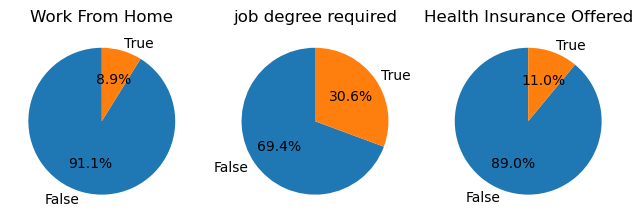

In [16]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'job degree required',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate (dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()
